# SVM Tree Worksheet

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

## Loading data

Load Pima diabetes dataset and split data, with test size being 25% and validation 20%.

In [ ]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

# load data
data = pd.read_csv(url, names=names)

# split data 
# columns we will use to make predictions with (features!) feel free to play around with these
X_cols = names[:-1]

# column that we want to predict
y_col = 'class'

# 75-25 train-test split of datset
test_size = 0.25
X_train, X_test, y_train, y_test = train_test_split(data[X_cols], data[y_col], test_size=test_size, random_state=0)

# further split X and y of training nto training and validation sets
test_size = 0.2
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=test_size, random_state=0)

## Creating Model

Create a model with sklearn's SVC and a high gamma value

In [ ]:
## YOUR CODE HERE
svm_high = SVC(gamma=10, C=1)
svm_high.fit(X_train, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Print accuracy of training and validation data

In [ ]:
#printing accuracy of testing & training data
y_train_pred=svm_high.predict(X_train)
print("Training Accuracy is ", accuracy_score(y_train, y_train_pred)*100)
y_val_pred=svm_high.predict(X_val)
print("Validation Accuracy is ", accuracy_score(y_val,y_val_pred)*100)

Training Accuracy is  100.0
Validation Accuracy is  60.3448275862069


Create a model with sklearn's SVC and a low gamma value

In [ ]:
# low gamma
svm_low = SVC(gamma=0.001, C=1)
svm_low.fit(X_train, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Print accuracy of training and validation data

In [ ]:
#printing accuracy of testing & training data
y_train_low=svm_low.predict(X_train)
print("Training Accuracy is ", accuracy_score(y_train, y_train_low)*100)
y_val_low=svm_low.predict(X_val)
print("Validation Accuracy is ", accuracy_score(y_val,y_val_low)*100)

Training Accuracy is  84.34782608695653
Validation Accuracy is  72.41379310344827


Explain the accuracy results below. 

A high gamma value often overfits the data and causes a high training accuracy, while a lower gamma is more balanced and will have a lower training accuracy and higher validation accuracy. 

## Metrics

Print the confusion matrices (both numeric and visualized)

Confusion Matrix High Gamma:
[[70  0]
 [46  0]]


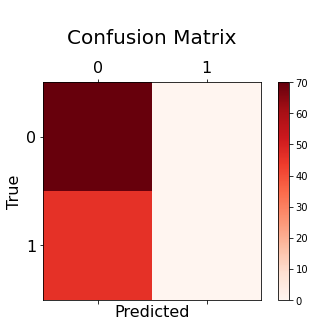

Confusion Matrix Low Gamma:
[[63  7]
 [25 21]]


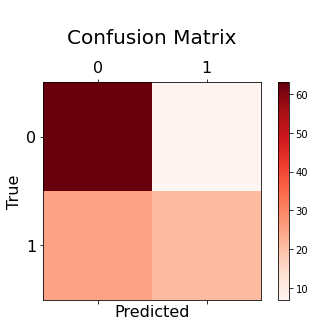

In [ ]:
## Confusion matrices
from sklearn import metrics
# high gamma
  # numeric
print('Confusion Matrix High Gamma:')
labels = [0,1]
cm = metrics.confusion_matrix(y_val, y_val_pred, labels)
print(cm)
  # visualized
# Visualize the confusion matrix
def plot_cmatrix(cm,labels,title='Confusion Matrix'):
  fig = plt.figure()
  ax = fig.add_subplot(111)
  cax = ax.matshow(cm,cmap='Reds')
  plt.title('\n'+title+'\n', fontsize=20)
  fig.colorbar(cax)
  ax.set_xticklabels([''] + labels, fontsize=16)
  ax.set_yticklabels([''] + labels, fontsize=16)
  plt.xlabel('Predicted', fontsize=16)
  plt.ylabel('True', fontsize=16)
  plt.show()
  
plot_cmatrix(cm,labels)
# low gamma
  # numeric
print('Confusion Matrix Low Gamma:')
labels = [0,1]
cm_low = metrics.confusion_matrix(y_val, y_val_low, labels)
print(cm_low)
  # visualized
plot_cmatrix(cm_low,labels)